In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
import seaborn as sns

In [108]:
'''
se define el indice Datetime para eliminar las columnas referentes a las fechas
de las erupciones y su hora de inicio. ademas se calculan las energias pasando 
los valores de la columna energy.KeV a dos valores float.
'''
file_path = r"C:\Python\HessiSolarFlare2018.csv"  #2002to2018.csv
df = pd.read_csv(file_path)
formatT = '%Y-%m-%d %H:%M:%S'
df['Datetime'] = pd.to_datetime(df['start.date'] + ' ' + df['start.time'], format=formatT)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
df = df.drop(columns=['start.date', 'start.time', 'Datetime'])
Emin = []
Emax = []
Eprom = []
for i in df['energy.kev']:
    result = re.findall(r'[\d\.\d]+', i)
    Emax.append(float(result[1]))
    Emin.append(float(result[0]))
    Eprom.append((float(result[0]) + float(result[1]))/2)
df['EnergiaMin']=Emin
df['EnergiaMax']=Emax
df['EnergiaProm']=Eprom
'''
Hago un calculo de las freciencias de la energia Promedio, Aunque por ahora
no es muy pertinente para el analisis, tal vez si pueda hacerse algo después.
plank=4.135667696*pow(10,-15)
vluz=3*pow(10,8)
Frec=[]
long=[]
for i in df['EnergiaProm']:
    Frec.append(i/plank)
    long.append(vluz/(i/plank))
df['Frec']=Frec
df['Long']=long
'''
#saca las flags en distintos dataframes
df1=pd.DataFrame(df.value_counts('flag.1'),columns=['Bandera1']).reset_index()
df2=pd.DataFrame(df.value_counts('flag.2'),columns=['Bandera2']).reset_index()
df3=pd.DataFrame(df.value_counts('flag.3'),columns=['Bandera3']).reset_index()
df4=pd.DataFrame(df.value_counts('flag.4'),columns=['Bandera4']).reset_index()
df5=pd.DataFrame(df.value_counts('flag.5'),columns=['Bandera5']).reset_index()
#calculo de las longitudes de onda
    
#Filtro para datos de calidad Q1 (la mayor posible de la base de datos con respecto a la flag Qn)
Q13=df['flag.3']=="Q1"
Q14=df['flag.4']=="Q1"
Q15=df['flag.5']=="Q1"
dfQ13=df[Q13]
dfQ1=pd.concat([df[Q13],df[Q14],df[Q15]]).sort_values('Datetime')

In [109]:
#graficas y analisis de datos
"""hipotesis estadistica de eventos solares con la bandera de posicion valida P1
   con datos de calidad Q1"""
P13=dfQ1['flag.3']=="P1"
P14=dfQ1['flag.4']=="P1"
P15=dfQ1['flag.5']=="P1"
#dataframe con los eventos solares observados (validos y posibles con calidad Q1)
dfsf=pd.concat([dfQ1[P13],dfQ1[P14],dfQ1[P15]]).sort_index()
#se extraen datos nulos
dfsffull=dfsf.dropna(how='any')
dfQ1full=dfQ1.dropna(how='any')
#imprimo la grafica
#sns.lineplot(data=dfsffull,x='Freq',y='EnergiaMin')
#promedios
PromEnergiaP=dfsffull['EnergiaProm'].mean()
PromEnergiaMin=dfsffull['EnergiaMin'].mean()
PromEnergiaMax=dfsffull['EnergiaMax'].mean()
Promduracion=dfsffull['duration.s'].mean()
#print("el promedio de la energia promedio es ",PromEnergiaP, "\n el primedio de la energia min es",PromEnergiaMin,"\n el promedio de la energia maxima es",PromEnergiaMax,"\n promedio de duracion",Promduracion)
dfsffull
#sns.displot(data=df, x='')

,flare,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5,EnergiaMin,EnergiaMax,EnergiaProm
Datetime,,,,,,,,,,,,,,,,,,,
2002-02-18 20:18:40,2021825,20:53:30,21:12:48,3248,304,2736546.0,12-25,-272,-202,339,9830,a0,A1,P1,PE,Q1,12.0,25.0,18.5
2002-02-18 22:30:12,2021886,22:30:18,22:45:16,904,18,68890.0,6-12,-269,-235,357,9830,a0,A1,P1,PE,Q1,6.0,12.0,9.0
2002-02-26 21:50:04,2022648,21:51:30,22:02:04,720,17,34426.0,6-12,800,-260,841,9839,A0,a1,P1,PE,Q1,6.0,12.0,9.0
2002-03-01 17:07:56,2030126,17:12:50,17:19:20,684,208,235168.0,12-25,920,-334,979,0,a0,A1,P1,PE,Q1,12.0,25.0,18.5
2002-03-14 01:35:32,2031402,01:46:26,01:55:44,1212,7408,23628974.0,50-100,-377,-76,385,0,a0,A1,EE,P1,Q1,50.0,100.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-22 18:41:12,16092226,18:41:50,18:43:52,160,24,4034.0,6-12,941,186,959,0,A0,a1,P1,PE,Q1,6.0,12.0,9.0
2016-10-17 00:27:24,16101702,00:34:10,00:48:24,1260,80,115703.0,12-25,973,-241,1003,2599,a0,A1,P1,PE,Q1,12.0,25.0,18.5
2016-11-29 07:05:12,16112908,07:09:58,07:21:08,956,464,123832.0,100-300,-849,-145,862,2615,a0,A1,P1,PE,Q1,100.0,300.0,200.0


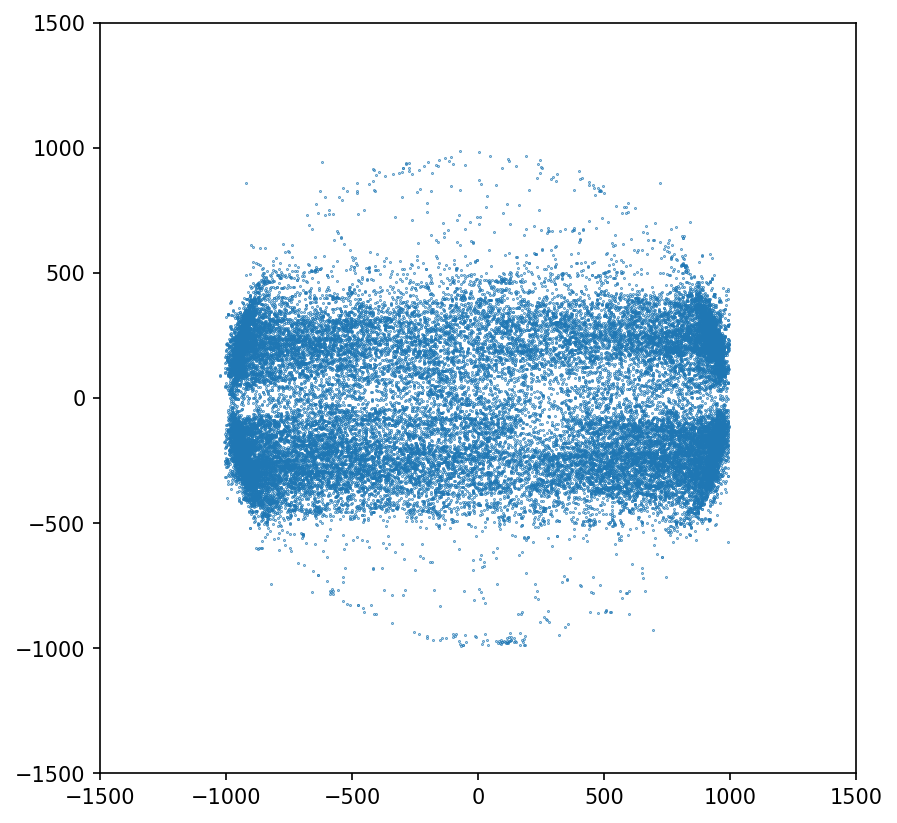

In [110]:
plt.figure(figsize=(6.5,6.5), dpi = 150)
plt.xlim(-1500,1500)
plt.ylim(-1500,1500)
plt.scatter(dfQ1['x.pos.asec'], dfQ1['y.pos.asec'],s=0.1)

In [111]:
#sns.kdeplot(data=dfsffull,x='duration.s',y='EnergiaProm')

$$
 \textbf{grafica de la posición de las erupciones clasificada por sus energias}
$$

In [112]:
'''
se clasificán los datos con respecto al rango de las energias presentes 
en esas erupciones
'''
energy1 = dfQ1['energy.kev'] == '12-25' # Se filtra por rango de energias
dfenergy1 = dfQ1[energy1]
energy2 = dfQ1['energy.kev'] == '6-12'
dfenergy2= dfQ1[energy2]
energy3 = dfQ1['energy.kev'] == '25-50'
dfenergy3= dfQ1[energy3]
energy4 = dfQ1['energy.kev']== '50-100'
dfenergy4=dfQ1[energy4]
#sns.lineplot(data=dfsffull,x='duration.s',y='EnergiaProm')
#datos = dfsffull['y.pos.asec'] 
#plt.figure(figsize=(12,5), dpi = 150)
#plt.boxplot(datos)
#datos.describe()

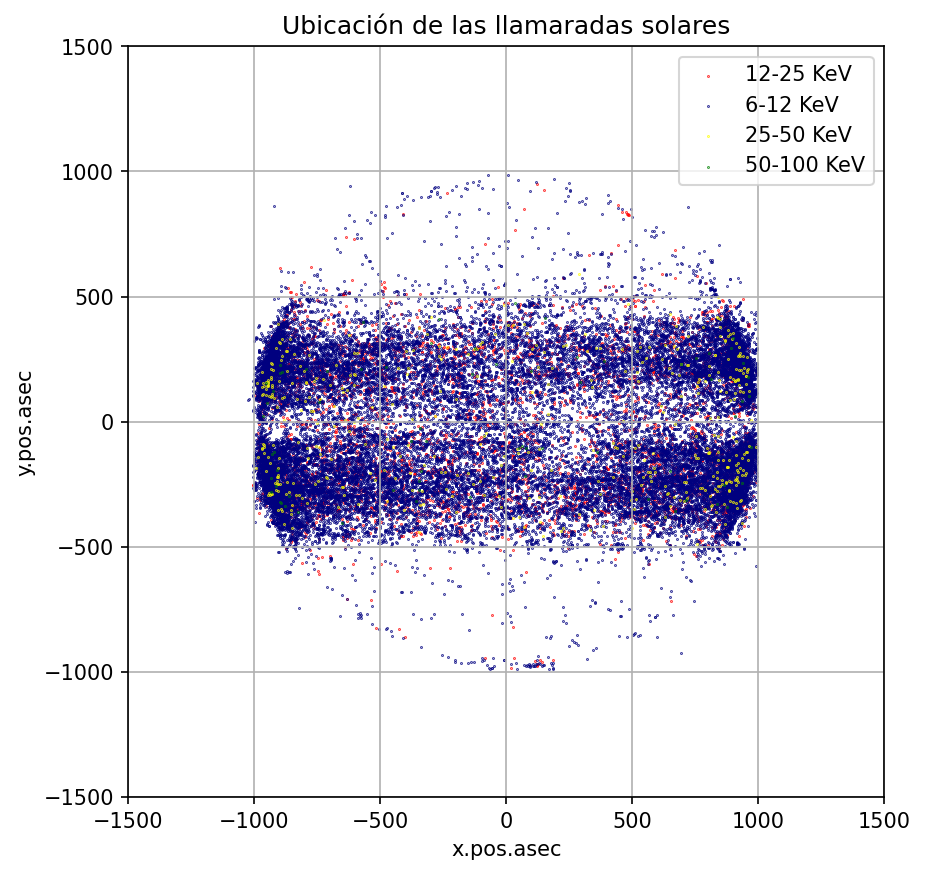

In [113]:
plt.figure(figsize=(6.5,6.5), dpi = 150, edgecolor='black')
plt.xlim(-1500,1500)
plt.ylim(-1500,1500)
plt.grid()
plt.title('Ubicación de las llamaradas solares')
plt.ylabel('y.pos.asec')
plt.xlabel('x.pos.asec')
plt.scatter(dfenergy1['x.pos.asec'], dfenergy1['y.pos.asec'],s=0.1, color='red', label='12-25 KeV')
plt.scatter(dfenergy2['x.pos.asec'], dfenergy2['y.pos.asec'],s=0.1, color='navy',label='6-12 KeV')
plt.scatter(dfenergy3['x.pos.asec'], dfenergy3['y.pos.asec'],s=0.1, color='yellow',label='25-50 KeV')
plt.scatter(dfenergy4['x.pos.asec'], dfenergy4['y.pos.asec'],s=0.1, color='green', label='50-100 KeV')
plt.legend()

$$
\textbf{Matriz de correlación}
$$

<AxesSubplot:title={'center':'Mapa de calor con respecto \n a la correlación de la base de datos'}>

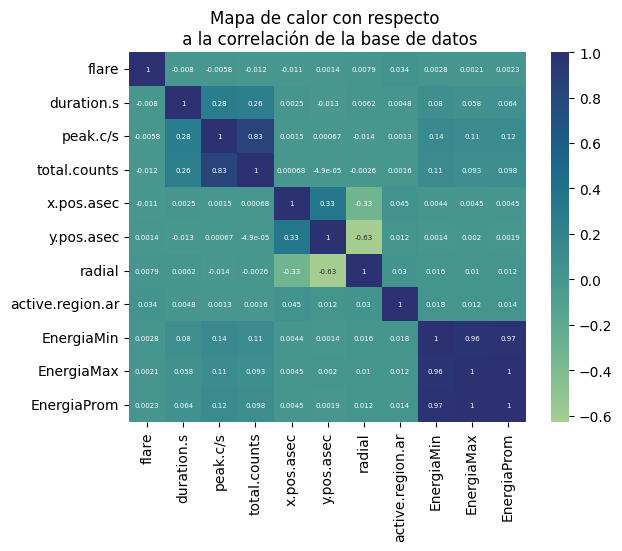

In [116]:
#se trabaja un mapa de calor para la 
matriz=df.corr(method='pearson',numeric_only=float)
plt.title('Mapa de calor con respecto \n a la correlación de la base de datos')
sns.heatmap(matriz,cmap='crest',annot=True,
           annot_kws={'fontsize':5})